In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Practica 5/polynomial-regression.csv')

In [50]:
# Separar las columnas en variables independientes (X) y dependiente (y)
X = df['araba_fiyat'].values[:-1]
y = df['araba_max_hiz'].values[:-1]

# Grado del polinomio
degree = 2  # Puedes ajustar el grado del polinomio según sea necesario

# Calcular las potencias de X para el grado del polinomio
X_powers = np.column_stack([X ** i for i in range(1, degree + 1)])

# Resolver el sistema de ecuaciones para obtener los coeficientes
coefficients = np.linalg.lstsq(X_powers, y, rcond=None)[0]

# Generar valores para predecir
X_pred = np.linspace(min(X), max(X), 100)
X_pred_powers = np.column_stack([X_pred ** i for i in range(1, degree + 1)])

# Realizar predicciones
y_pred = np.dot(X_pred_powers, coefficients)

y_pred

array([ 51.2906737 ,  67.48362627,  83.40155829,  99.04446973,
       114.41236062, 129.50523094, 144.3230807 , 158.8659099 ,
       173.13371853, 187.1265066 , 200.84427411, 214.28702105,
       227.45474743, 240.34745325, 252.9651385 , 265.30780319,
       277.37544732, 289.16807089, 300.68567389, 311.92825633,
       322.8958182 , 333.58835952, 344.00588027, 354.14838045,
       364.01586008, 373.60831914, 382.92575764, 391.96817557,
       400.73557294, 409.22794975, 417.445306  , 425.38764168,
       433.0549568 , 440.44725135, 447.56452535, 454.40677878,
       460.97401164, 467.26622395, 473.28341569, 479.02558686,
       484.49273748, 489.68486753, 494.60197702, 499.24406594,
       503.61113431, 507.70318211, 511.52020934, 515.06221601,
       518.32920212, 521.32116767, 524.03811265, 526.48003708,
       528.64694093, 530.53882423, 532.15568696, 533.49752913,
       534.56435073, 535.35615178, 535.87293225, 536.11469217,
       536.08143152, 535.77315031, 535.18984854, 534.33

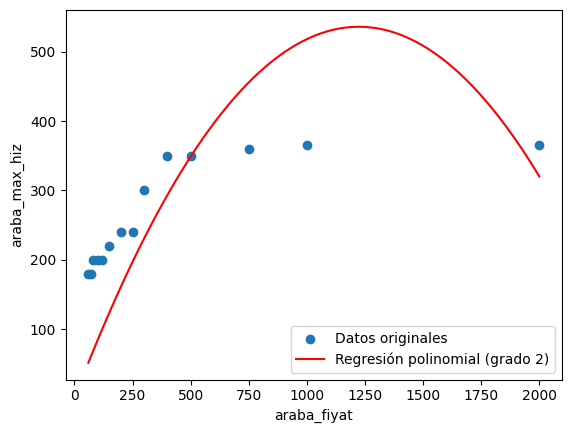

In [51]:
# Graficar los datos originales y la regresión polinomial
plt.scatter(X, y, label='Datos originales')
plt.plot(X_pred, y_pred, color='red', label=f'Regresión polinomial (grado {degree})')
plt.xlabel('araba_fiyat')
plt.ylabel('araba_max_hiz')
plt.legend()
plt.show()

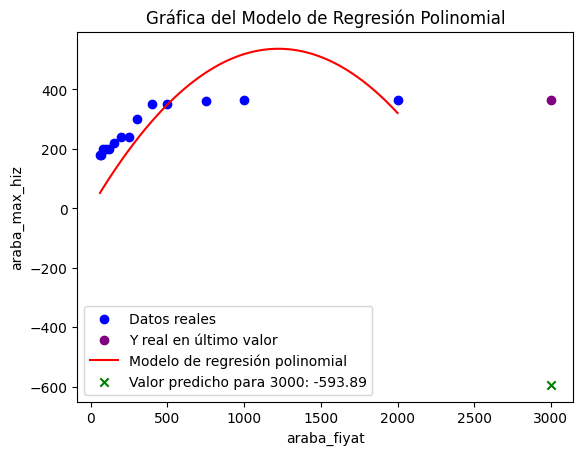

In [49]:
# Gráfica de los datos reales
plt.scatter(X, y, label='Datos reales', color='blue')

# Gráfica del punto 'y real' que quieres destacar
valor_x = df['araba_fiyat'].values[-1]
valor_y = df['araba_max_hiz'].values[-1]
plt.scatter(valor_x, valor_y, label='Y real en último valor', color='purple')

# Gráfica de la regresión polinomial
plt.plot(X_pred, y_pred, label='Modelo de regresión polinomial', color='red')

# Valor específico para predecir
x_value = 3000
y_value = np.dot([x_value ** i for i in range(1, degree + 1)], coefficients)
plt.scatter(x_value, y_value, color='Green', marker='x', label=f'Valor predicho para {x_value}: {y_value:.2f}')

plt.xlabel('araba_fiyat')
plt.ylabel('araba_max_hiz')
plt.legend()
plt.title('Gráfica del Modelo de Regresión Polinomial')
plt.show()